### chenxicrypto 1.3.0 examples for use

In [1]:
'''
chenxicrypto 1.3.0 examples for use
'''
import chenxicrypto as cc
import matplotlib.pyplot as plt

#### fetch data of cryptocurrency

In [2]:
data = cc.CryptoData()

symbol = 'BTC-USDT'
startAt = '2022-01-24 12:00:00'
endAt = '2022-01-24 12:30:00'
interval = '1min'

t = data.time(startAt, endAt, interval)
opening_price = data.opening(symbol, startAt, endAt, interval)
closing_price = data.close(symbol, startAt, endAt, interval)
highest = data.high(symbol, startAt, endAt, interval)
lowest = data.low(symbol, startAt, endAt, interval)
volume = data.volume(symbol, startAt, endAt, interval)
amount = data.amount(symbol, startAt, endAt, interval)
#print(t, opening_price, closing_price, highest, lowest, volume, amount, sep = '\n\n')

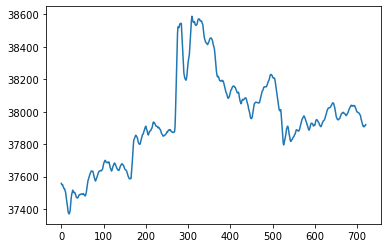

In [3]:
# Moving Average
symbol = 'BTC-USDT'
startAt = '2022-01-30 00:00:00'
endAt = '2022-01-30 12:00:00'
interval = '1min'
infotype = 'close'
# infotype can be one of 'open', 'close', 'high', 'low', 'volume' and 'amount'.

ma6 = data.MA(symbol, startAt, endAt, interval, infotype, 6)
plt.plot(ma6)

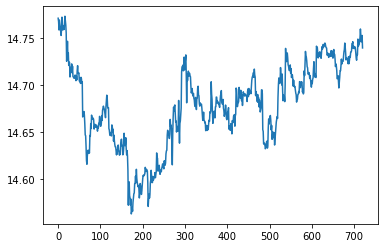

In [4]:
# Relative Strength
symbol = 'BTC-USDT'
inference_symbol = 'ETH-USDT'
startAt = '2022-01-30 00:00:00'
endAt = '2022-01-30 12:00:00'
interval = '1min'
infotype = 'close'

rs = data.RS(symbol, inference_symbol, startAt, endAt, interval, infotype)
plt.plot(rs)

In [5]:
# indicate rise or fall. 1.2.3 feature
# 0 represents rise, while 1 is fall. The first item is always 0. 
symbol = 'BTC-USDT'
startAt = '2022-01-01 00:00:00'
endAt = '2022-01-31 23:59:59'
ttype = '1day'
infotype = 'close'

rof = data.RiseOrFall(symbol, startAt, endAt, ttype, infotype)
print(rof)

[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]


#### simulation

profit of your strategy: -0.034582891187765565
buy-and-stay profit: 0.011083277814790179
commission cost rate: 0.04542258959577894


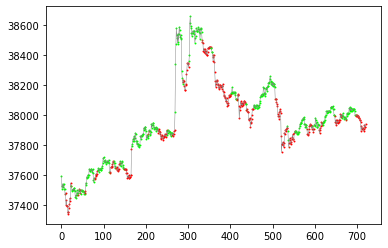

In [6]:
'''
This is an example of how to use the Simulation module.
'''
class Simul(cc.Simulation):
    def __init__(self):
        super(Simul, self).__init__()
        
        # information that you must give
        self.symbol = 'BTC-USDT'
        self.startAt = '2022-01-30 00:00:00'
        self.endAt = '2022-01-30 12:00:00'
        self.ttype = '1min'
        
        # information that you need while rewriting buy/sell signal function
        # in this example, we need moving average(k = 6, 24) of close price
        self.ma6 = data.MA(self.symbol, self.startAt, self.endAt, self.ttype, 'close', 6)
        self.ma24 = data.MA(self.symbol, self.startAt, self.endAt, self.ttype, 'close', 24)
        
        self.timeList = data.timeStamp(self.startAt, self.endAt, self.ttype)
        self.priceList = data.close(self.symbol, self.startAt, self.endAt, self.ttype)
        
        # commission rate. 1.2.2 feature
        self.commission = 0.001
    
    # rewrite your buy signal function, 
    # should return the percent of your cash remaining to buy stock
    def buySignal(self):
        buyPercent = 0.0
        if self.ma6[self.i] < self.ma24[self.i]:
            buyPercent = 0.8
        return buyPercent

    # rewrite your sell signal function, 
    # should return the percent of your stock remaining to sell for cash
    def sellSignal(self):
        sellPercent = 0.0
        if self.ma6[self.i] > self.ma24[self.i]:
            sellPercent = 1.0
        return sellPercent

    # process before/after one step. 1.2.1 feature
    def beforeStep(self):
        pass
    
    def afterStep(self):
        pass
    
simul = Simul()

# process the simulation and it will calculate total profit rate
simul.simulate()
print('profit of your strategy:', simul.profit)
print('buy-and-stay profit:', simul.simpleProfit)
print('commission cost rate:', simul.commissionCostRate)

# visualize
# more red means more stock possess, as green for cash 
simul.visual()